### Mon application permettra, seulement avec une photo du produit ou du code-barre, d'obtenir le nutriscore du produit.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)

In [2]:
import csv

#lecture du fichier pour voir le séparateur 

with open('fr.openfoodfacts.org.products.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['code\turl\tcreator\tcreated_t\tcreated_datetime\tlast_modified_t\tlast_modified_datetime\tproduct_name\tgeneric_name\tquantity\tpackaging\tpackaging_tags\tbrands\tbrands_tags\tcategories\tcategories_tags\tcategories_fr\torigins\torigins_tags\tmanufacturing_places\tmanufacturing_places_tags\tlabels\tlabels_tags\tlabels_fr\temb_codes\temb_codes_tags\tfirst_packaging_code_geo\tcities\tcities_tags\tpurchase_places\tstores\tcountries\tcountries_tags\tcountries_fr\tingredients_text\tallergens\tallergens_fr\ttraces\ttraces_tags\ttraces_fr\tserving_size\tno_nutriments\tadditives_n\tadditives\tadditives_tags\tadditives_fr\tingredients_from_palm_oil_n\tingredients_from_palm_oil\tingredients_from_palm_oil_tags\tingredients_that_may_be_from_palm_oil_n\tingredients_that_may_be_from_palm_oil\tingredients_that_may_be_from_palm_oil_tags\tnutrition_grade_uk\tnutrition_grade_fr\tpnns_groups_1\tpnns_groups_2\tstates\tstates_tags\tstates_fr\tmain_category\tmain_category_fr\timage_url\timage_small_url\te

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 6480: character maps to <undefined>

In [3]:
#lire fichier csv
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t')
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#nombres de lignes et de colonnes
df.shape

(320772, 162)

In [5]:
#proportion de valeur(s) manquante(s)
df.isna().mean()

code                                          0.000072
url                                           0.000072
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
last_modified_t                               0.000000
last_modified_datetime                        0.000000
product_name                                  0.055373
generic_name                                  0.835413
quantity                                      0.673229
packaging                                     0.753844
packaging_tags                                0.753841
brands                                        0.088574
brands_tags                                   0.088599
categories                                    0.736854
categories_tags                               0.736919
categories_fr                                 0.736850
origins                                       0.930823
origins_ta

In [6]:
#doublons
df.duplicated().sum()

0

[]

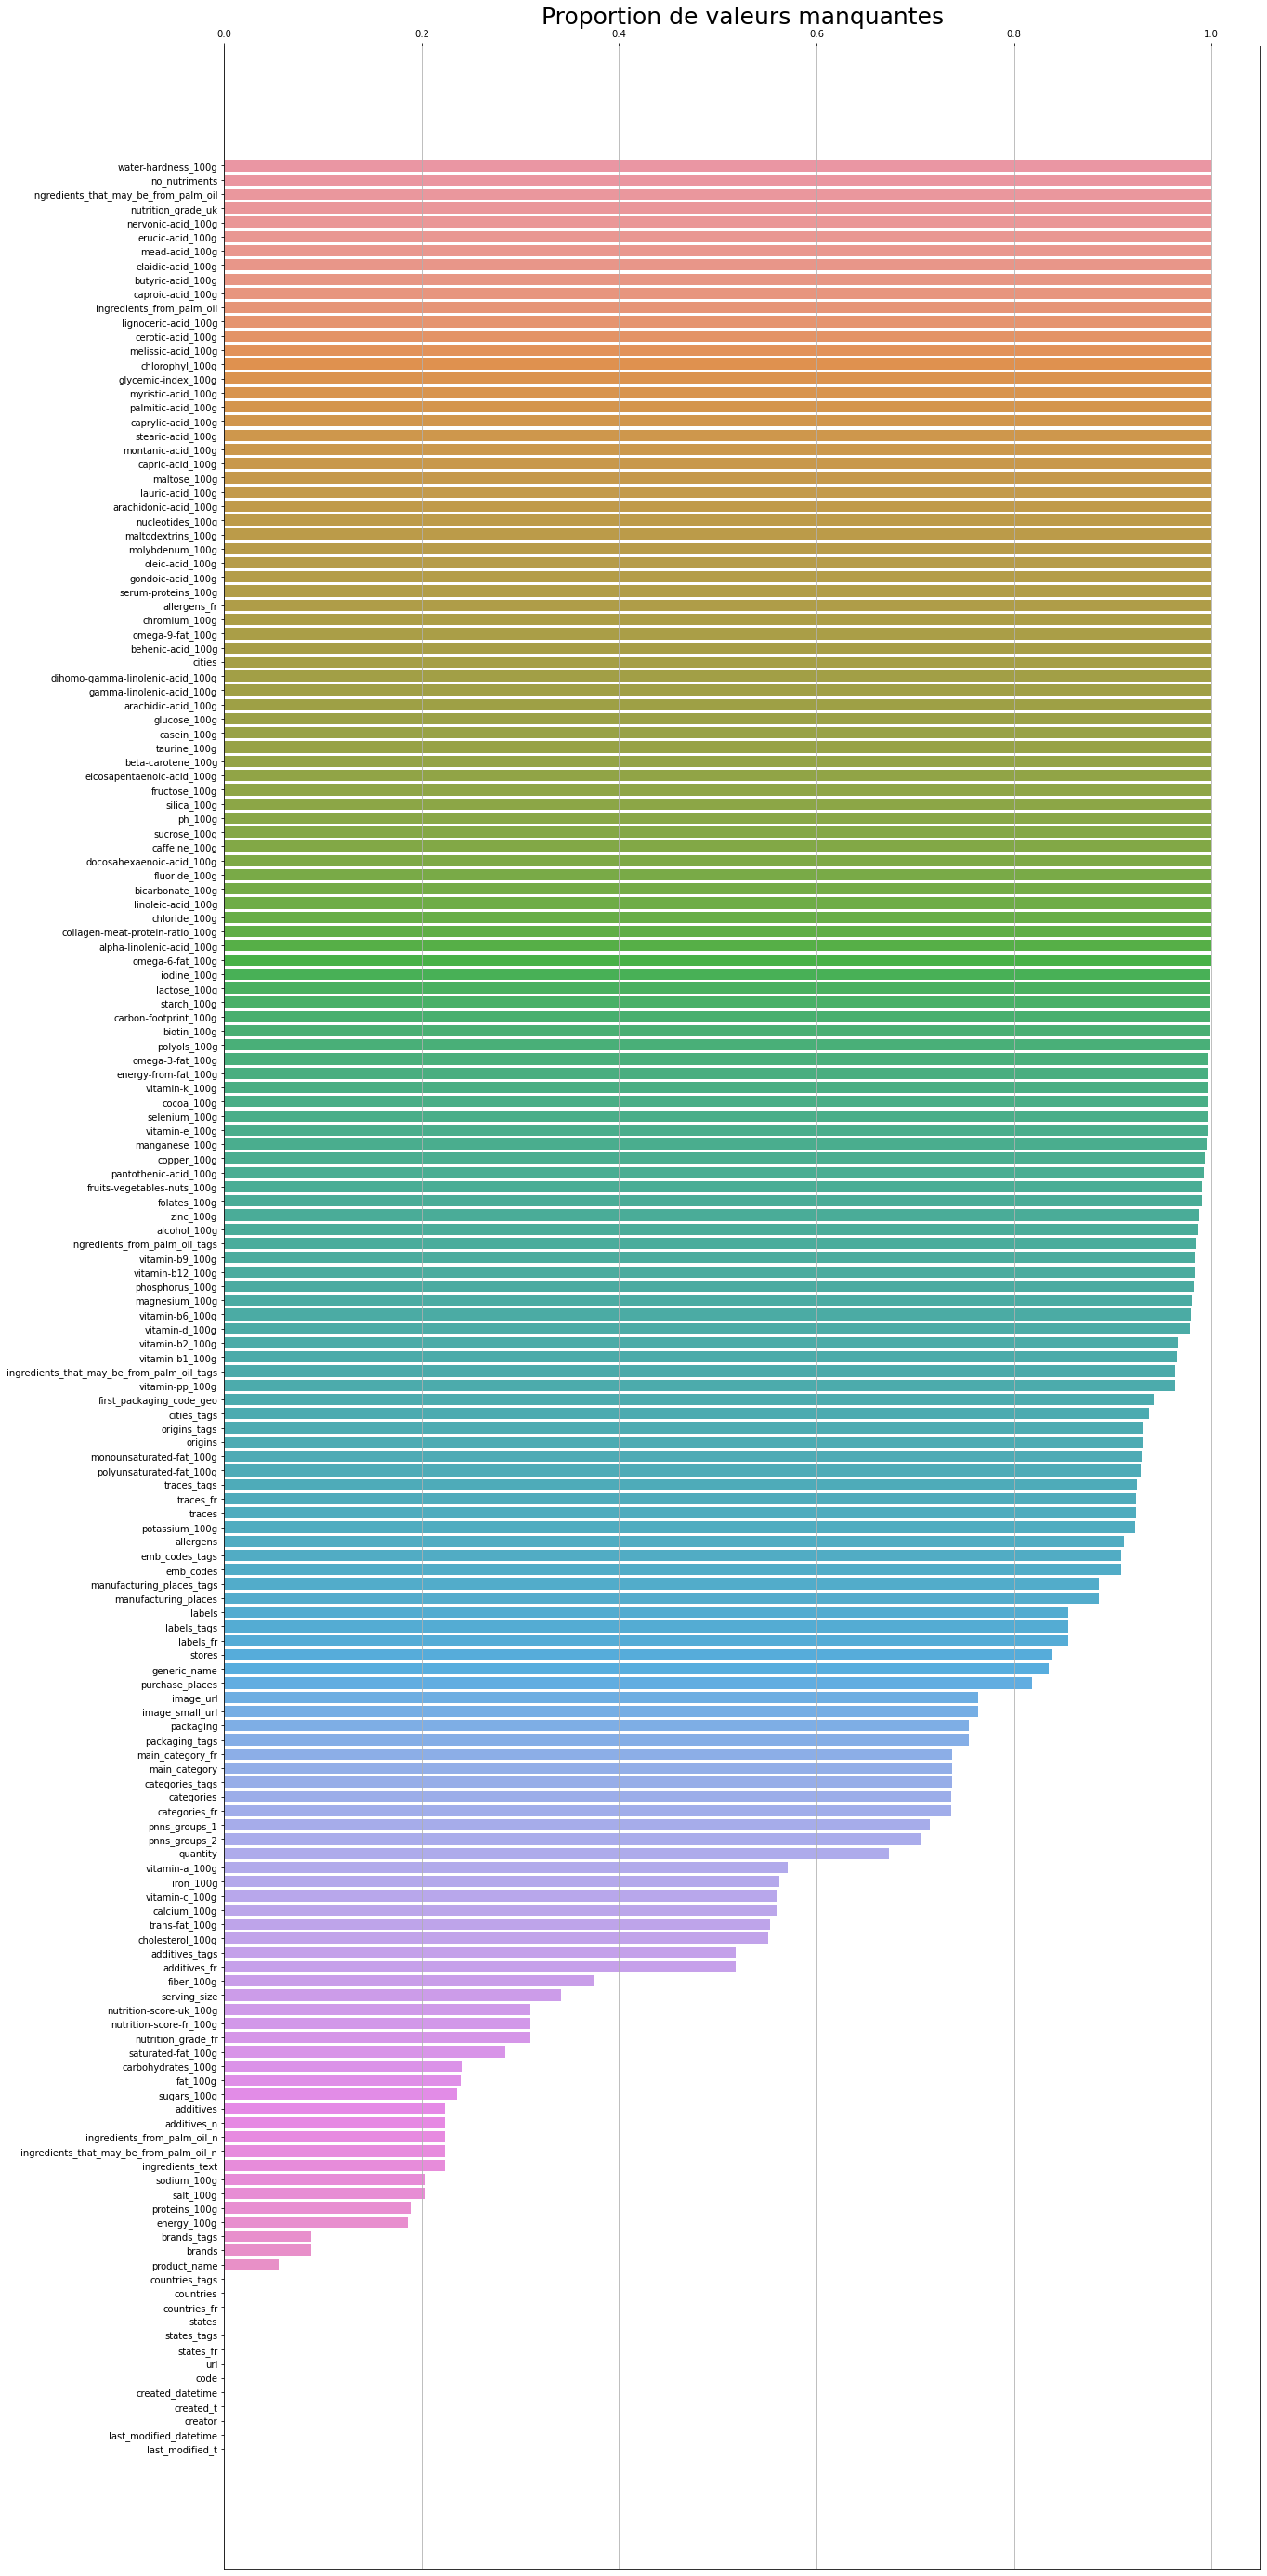

In [7]:
#proportion de valeurs manquantes par colonne

proportion = df.isna().mean().sort_values(ascending=False)

plt.figure(figsize=[20,50])
plt.title('Proportion de valeurs manquantes',fontsize=25)
ax=sns.barplot(x=proportion.values,y=proportion.index)
plt.grid(axis='x')
ax.xaxis.set_ticks_position('top')
plt.plot()

[]

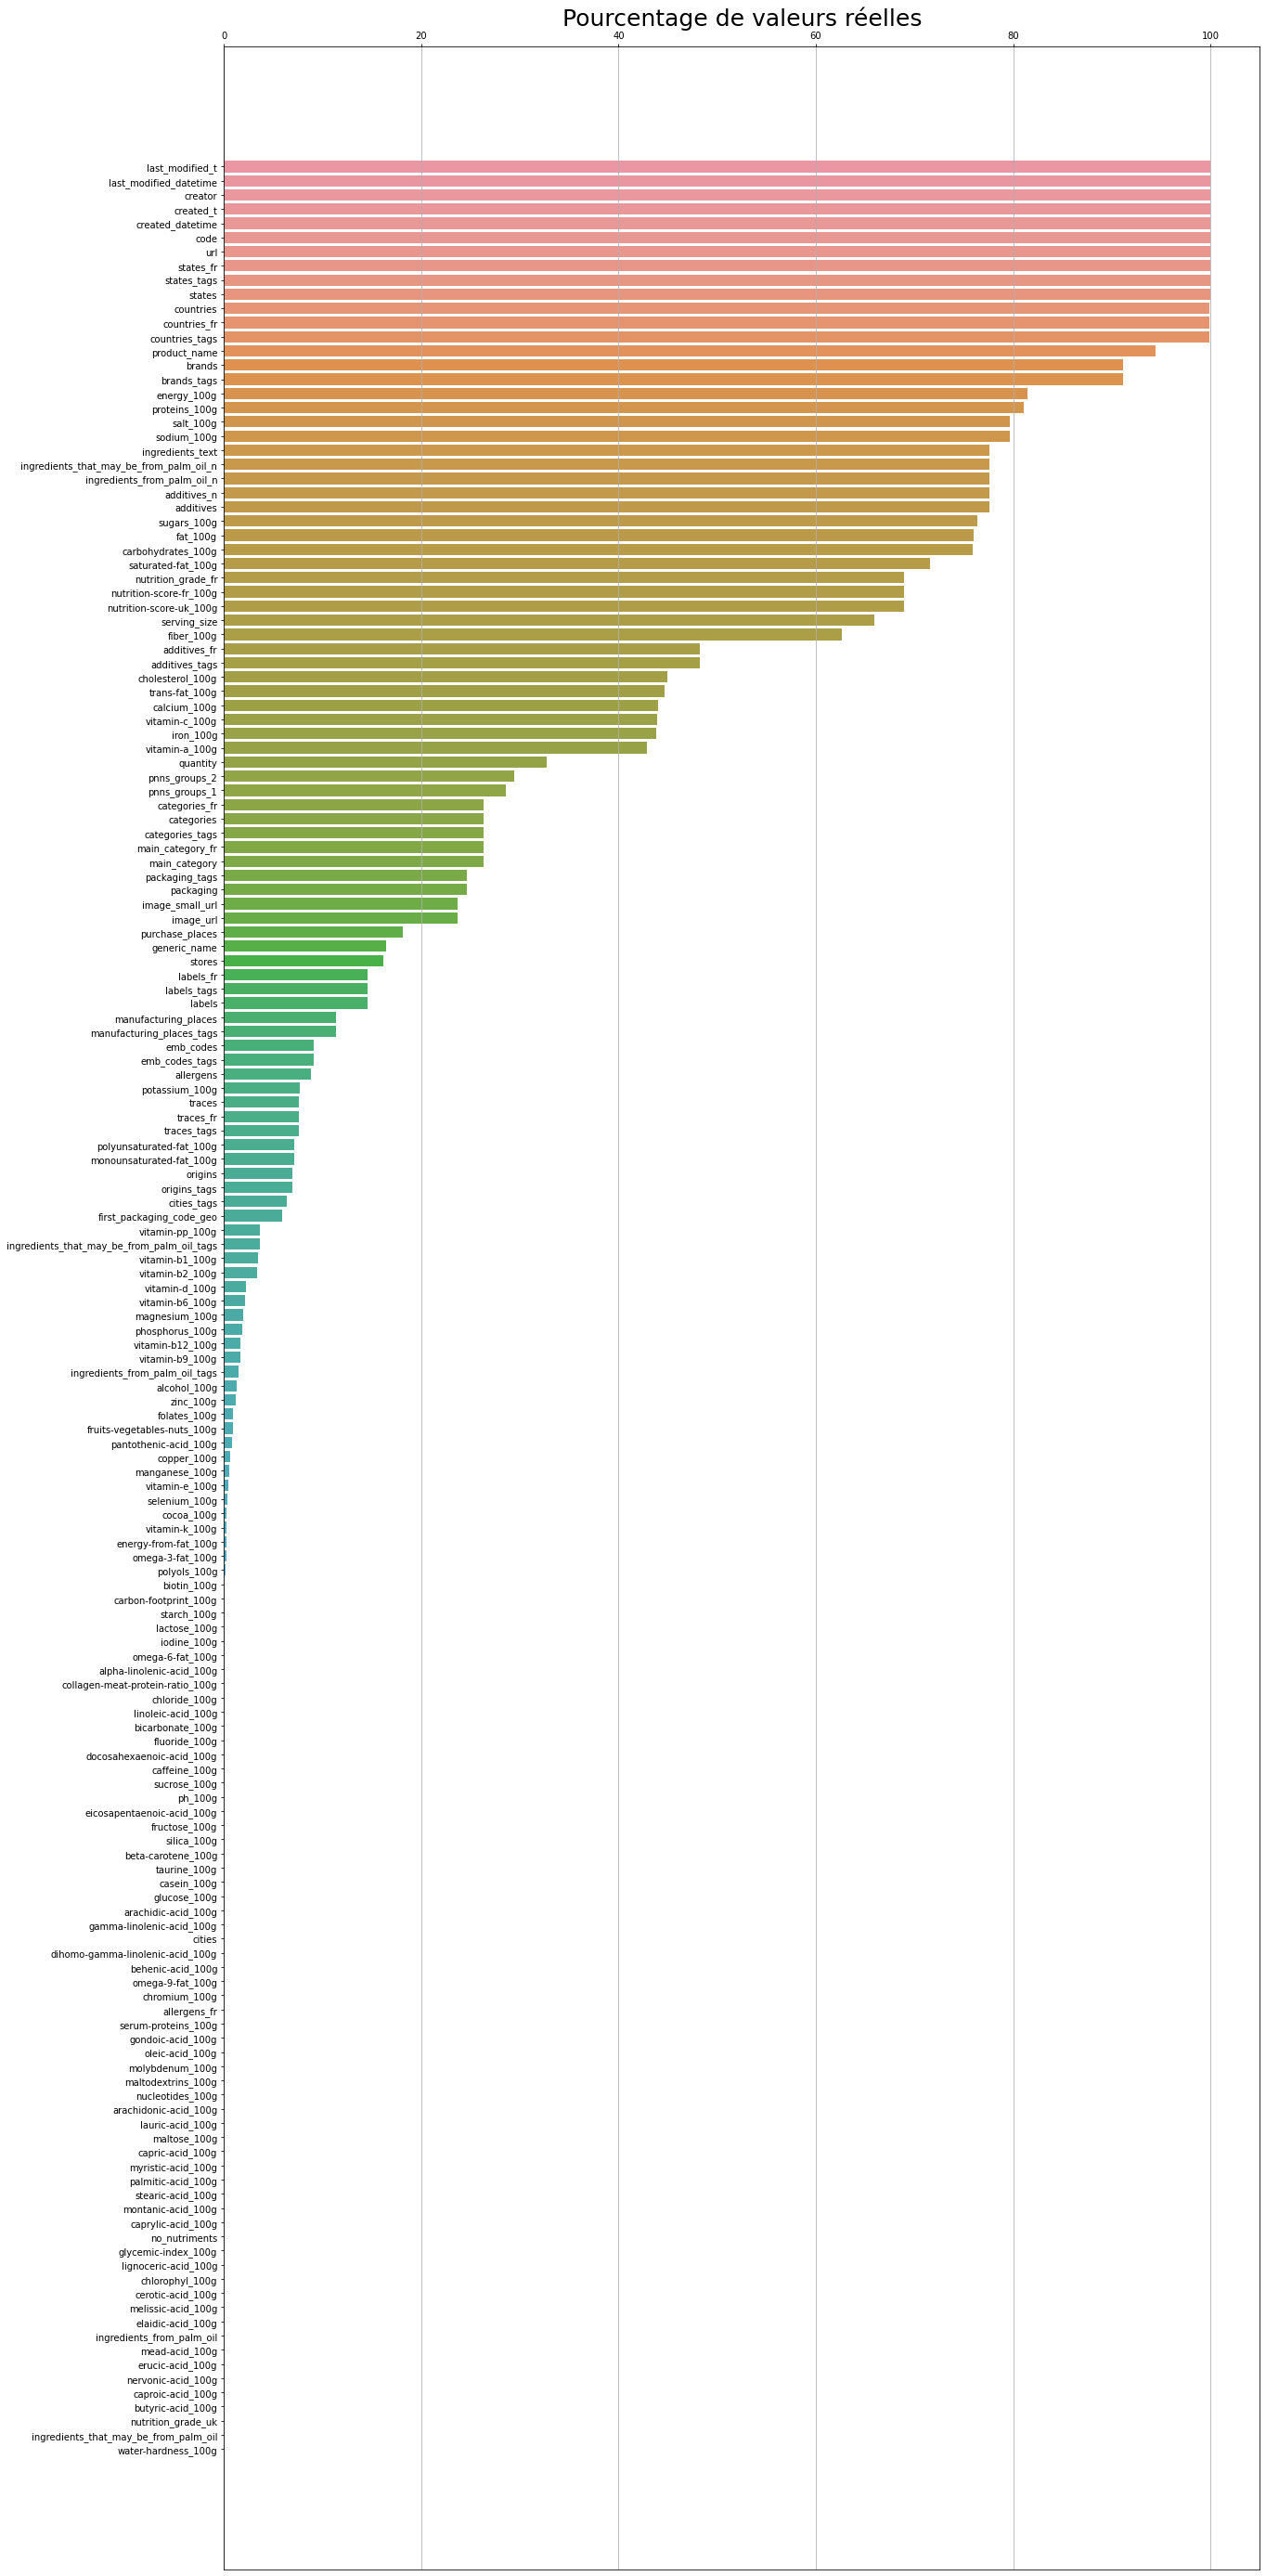

In [8]:
#pourcentage de valeurs réelles par colonne

pourcentage =(( 1 - df.isna().mean())*100).sort_values(ascending=False)

plt.figure(figsize=[20,50])
plt.title('Pourcentage de valeurs réelles',fontsize=25)
ax = sns.barplot(x=pourcentage.values,y=pourcentage.index)
plt.grid(axis='x')
ax.xaxis.set_ticks_position('top')
plt.plot()

In [9]:
#trouver les colonnes où toute les valeurs sont nan
cols_vides = [col for col in df.columns if df[col].isnull().all()]

In [10]:
#supprimer les colonnes vides
df.drop(cols_vides, axis=1, inplace=True)

In [11]:
df.shape

(320772, 146)

In [12]:
df.dropna(axis=1, thresh=192463,inplace=True)

In [13]:
df.shape

(320772, 34)

In [14]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

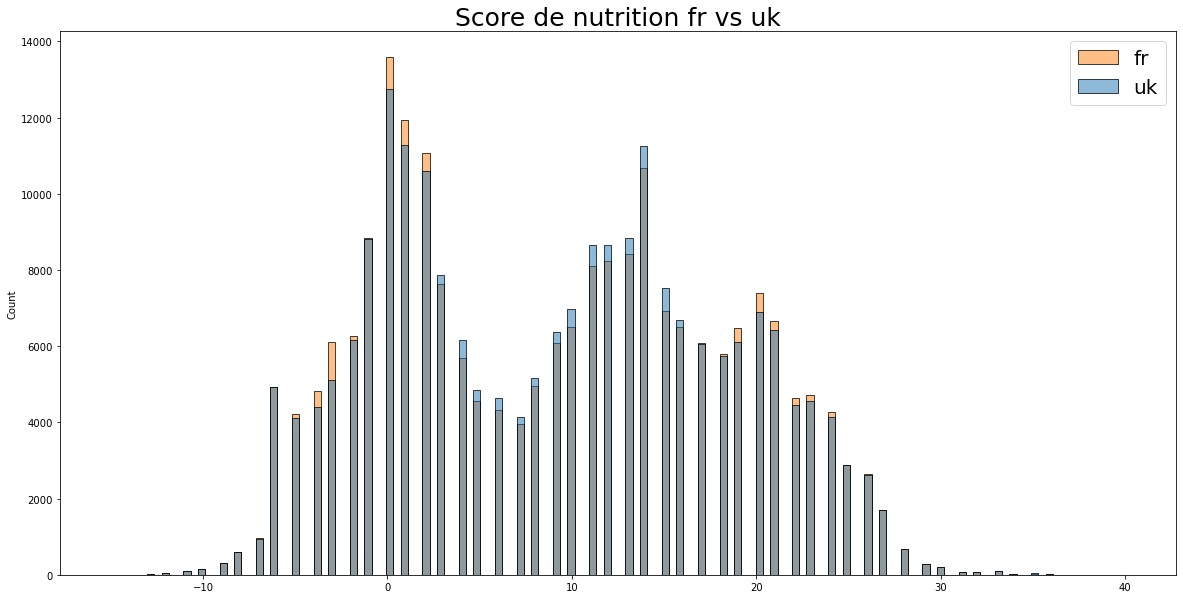

In [15]:
plt.figure(figsize=[20,10])

sns.histplot([df['nutrition-score-fr_100g'],df['nutrition-score-uk_100g']])

plt.legend(['fr','uk'],loc='upper right',fontsize=20)

plt.title('Score de nutrition fr vs uk',fontsize=25)

plt.show()

In [16]:
delete_columns = ['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size','additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n','states', 'states_tags', 'states_fr','nutrition-score-uk_100g']

In [17]:
df.drop(columns=delete_columns,inplace=True)

In [18]:
df.shape

(320772, 12)

In [19]:
df.columns

Index(['product_name', 'nutrition_grade_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

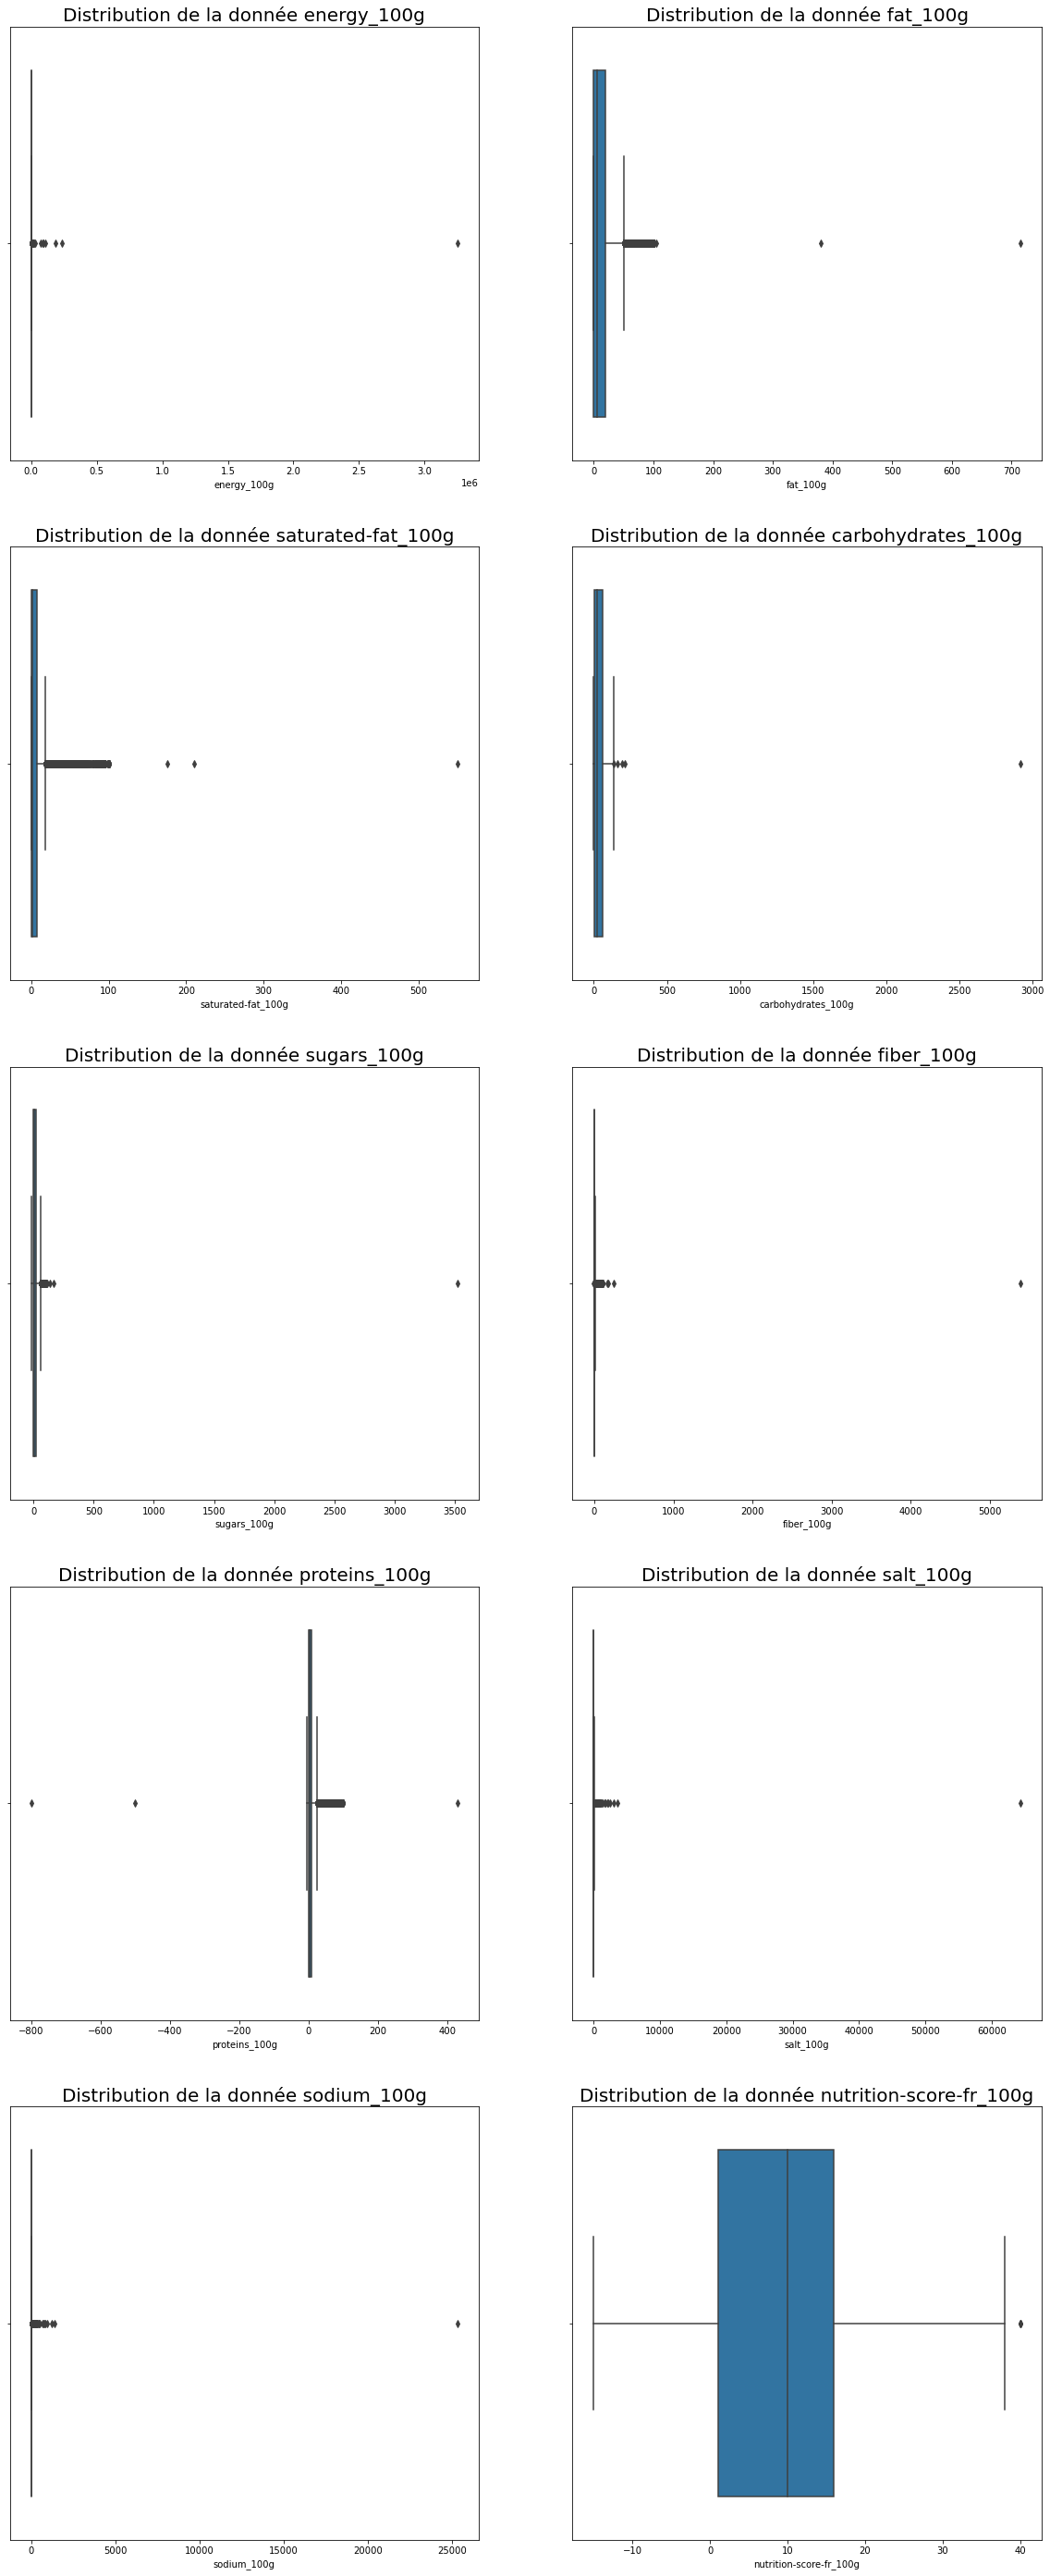

In [20]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g','nutrition-score-fr_100g']

fig, axes = plt.subplots(5, 2,figsize=(20, 50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    a = sns.boxplot(df[col],ax=ax)
    a.axes.set_title('Distribution de la donnée '+col,fontsize=20)

plt.show()

In [21]:
# catégories 100g(sauf energie et nutrition) > 100g à supprimer
for col in df.columns:
    if col not in ["product_name","nutrition_grade_fr","energy_100g",'nutrition-score-fr_100g']:
        df = df.loc[(df[col] >= 0)&(df[col] <= 100)]

In [22]:
df.shape

(176686, 12)

In [23]:
# 0 < energie < 3700 kJ
df = df.loc[(df['energy_100g'] <= 3700)&(df['energy_100g']>0)]

In [24]:
df.shape

(174833, 12)

In [25]:
#sucre> carbohydrate
df = df.loc[df['carbohydrates_100g'] >= df['sugars_100g']]

In [26]:
df.shape

(174284, 12)

In [27]:
df.isnull().sum()

product_name               2014
nutrition_grade_fr          335
energy_100g                   0
fat_100g                      0
saturated-fat_100g            0
carbohydrates_100g            0
sugars_100g                   0
fiber_100g                    0
proteins_100g                 0
salt_100g                     0
sodium_100g                   0
nutrition-score-fr_100g     335
dtype: int64

In [28]:
#on enlève les produits dont on ne connait pas le nom
df = df[df['product_name'].notna()]
df.isnull().sum()

product_name                 0
nutrition_grade_fr         334
energy_100g                  0
fat_100g                     0
saturated-fat_100g           0
carbohydrates_100g           0
sugars_100g                  0
fiber_100g                   0
proteins_100g                0
salt_100g                    0
sodium_100g                  0
nutrition-score-fr_100g    334
dtype: int64

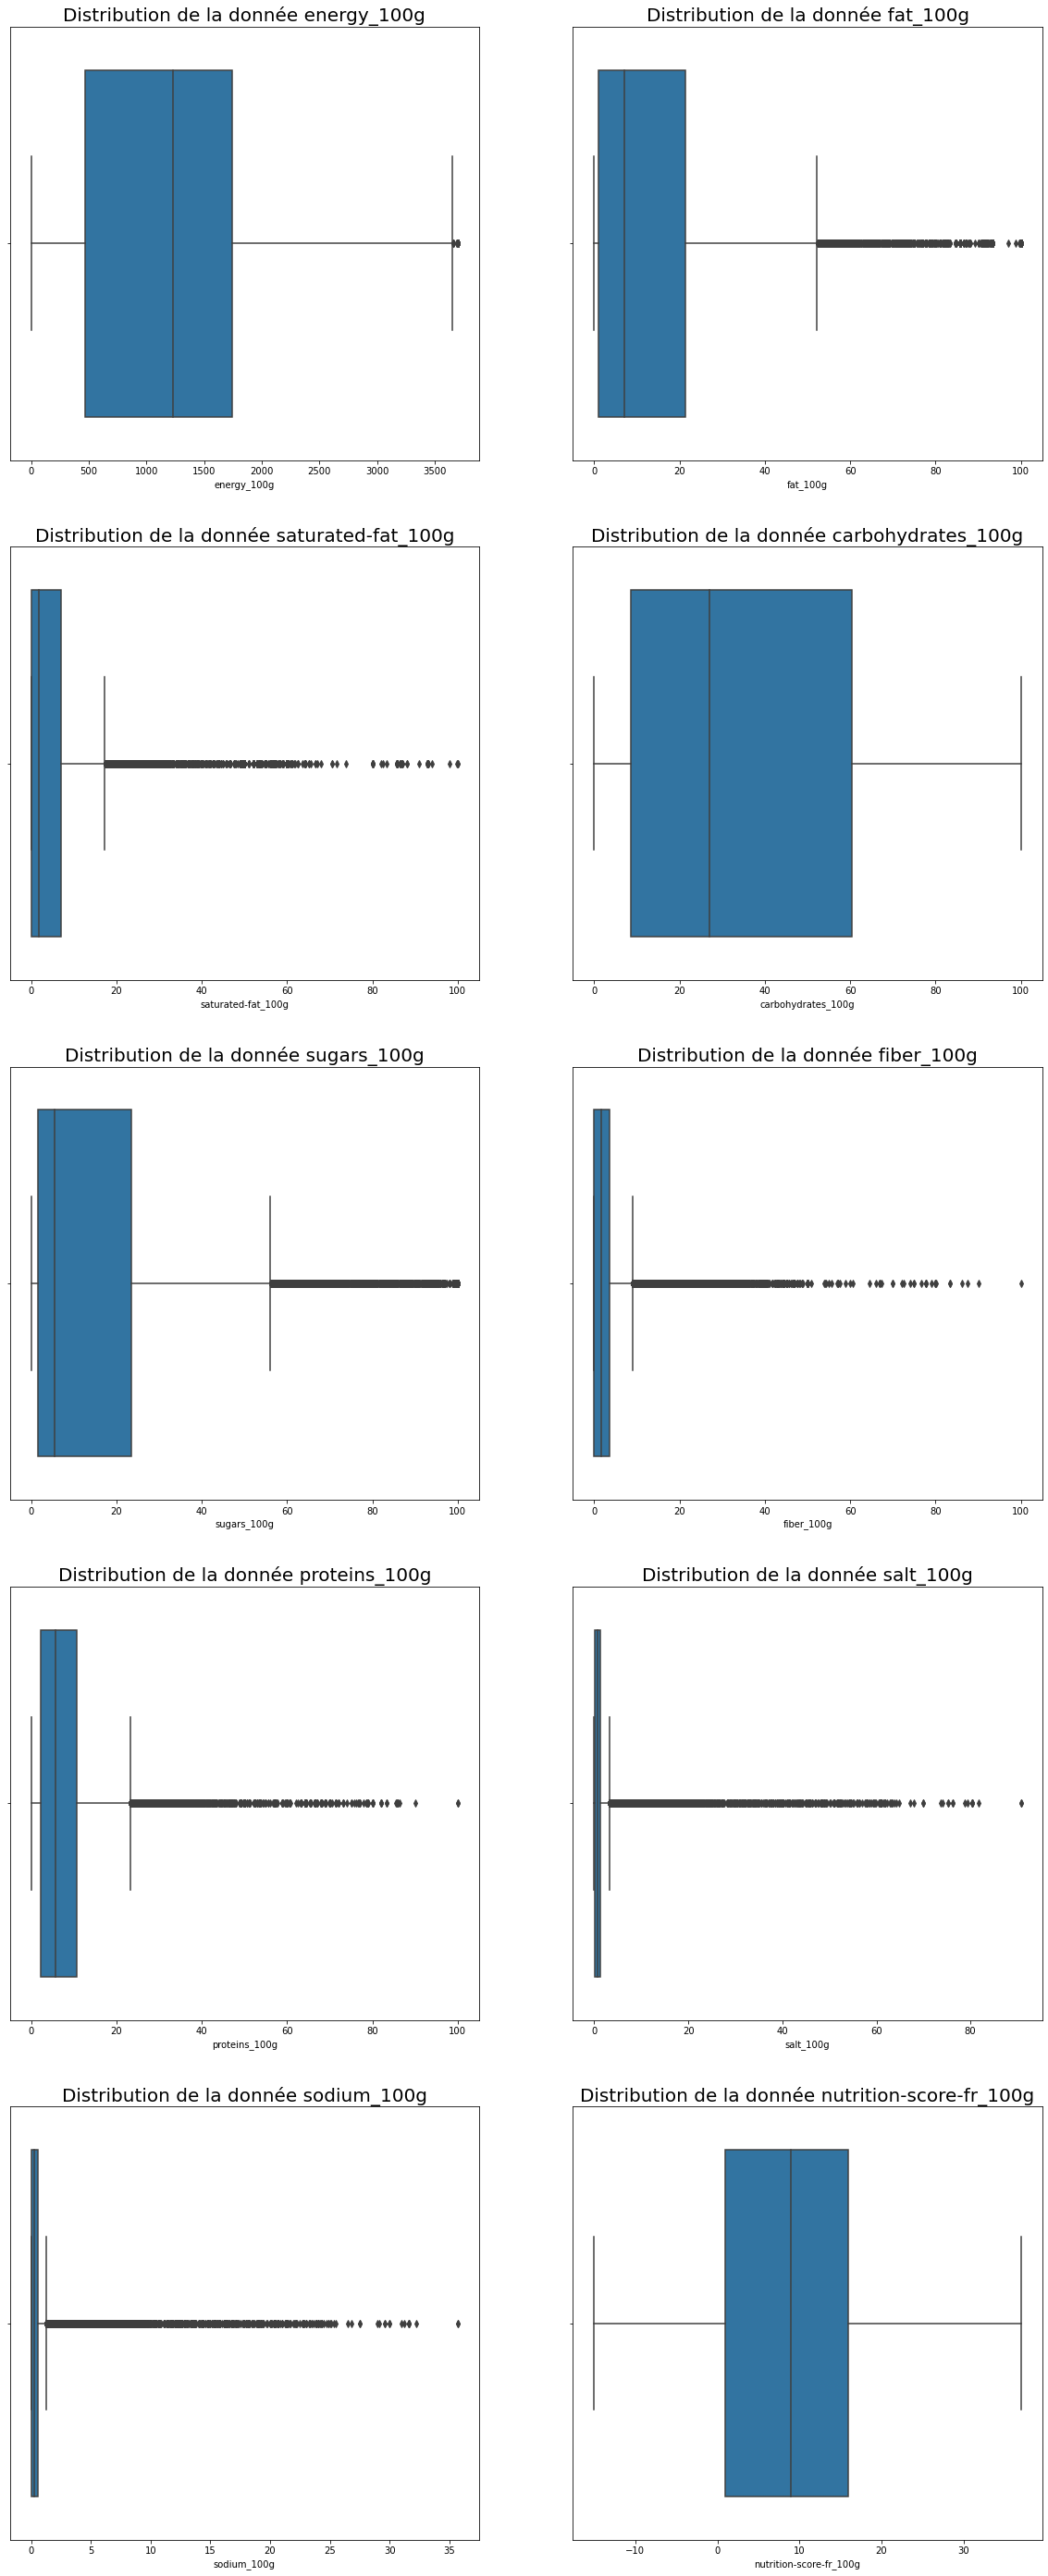

In [29]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g','nutrition-score-fr_100g']

fig, axes = plt.subplots(5, 2,figsize=(20, 50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    a = sns.boxplot(df[col],ax=ax)
    a.axes.set_title('Distribution de la donnée '+col,fontsize=20)

plt.show()

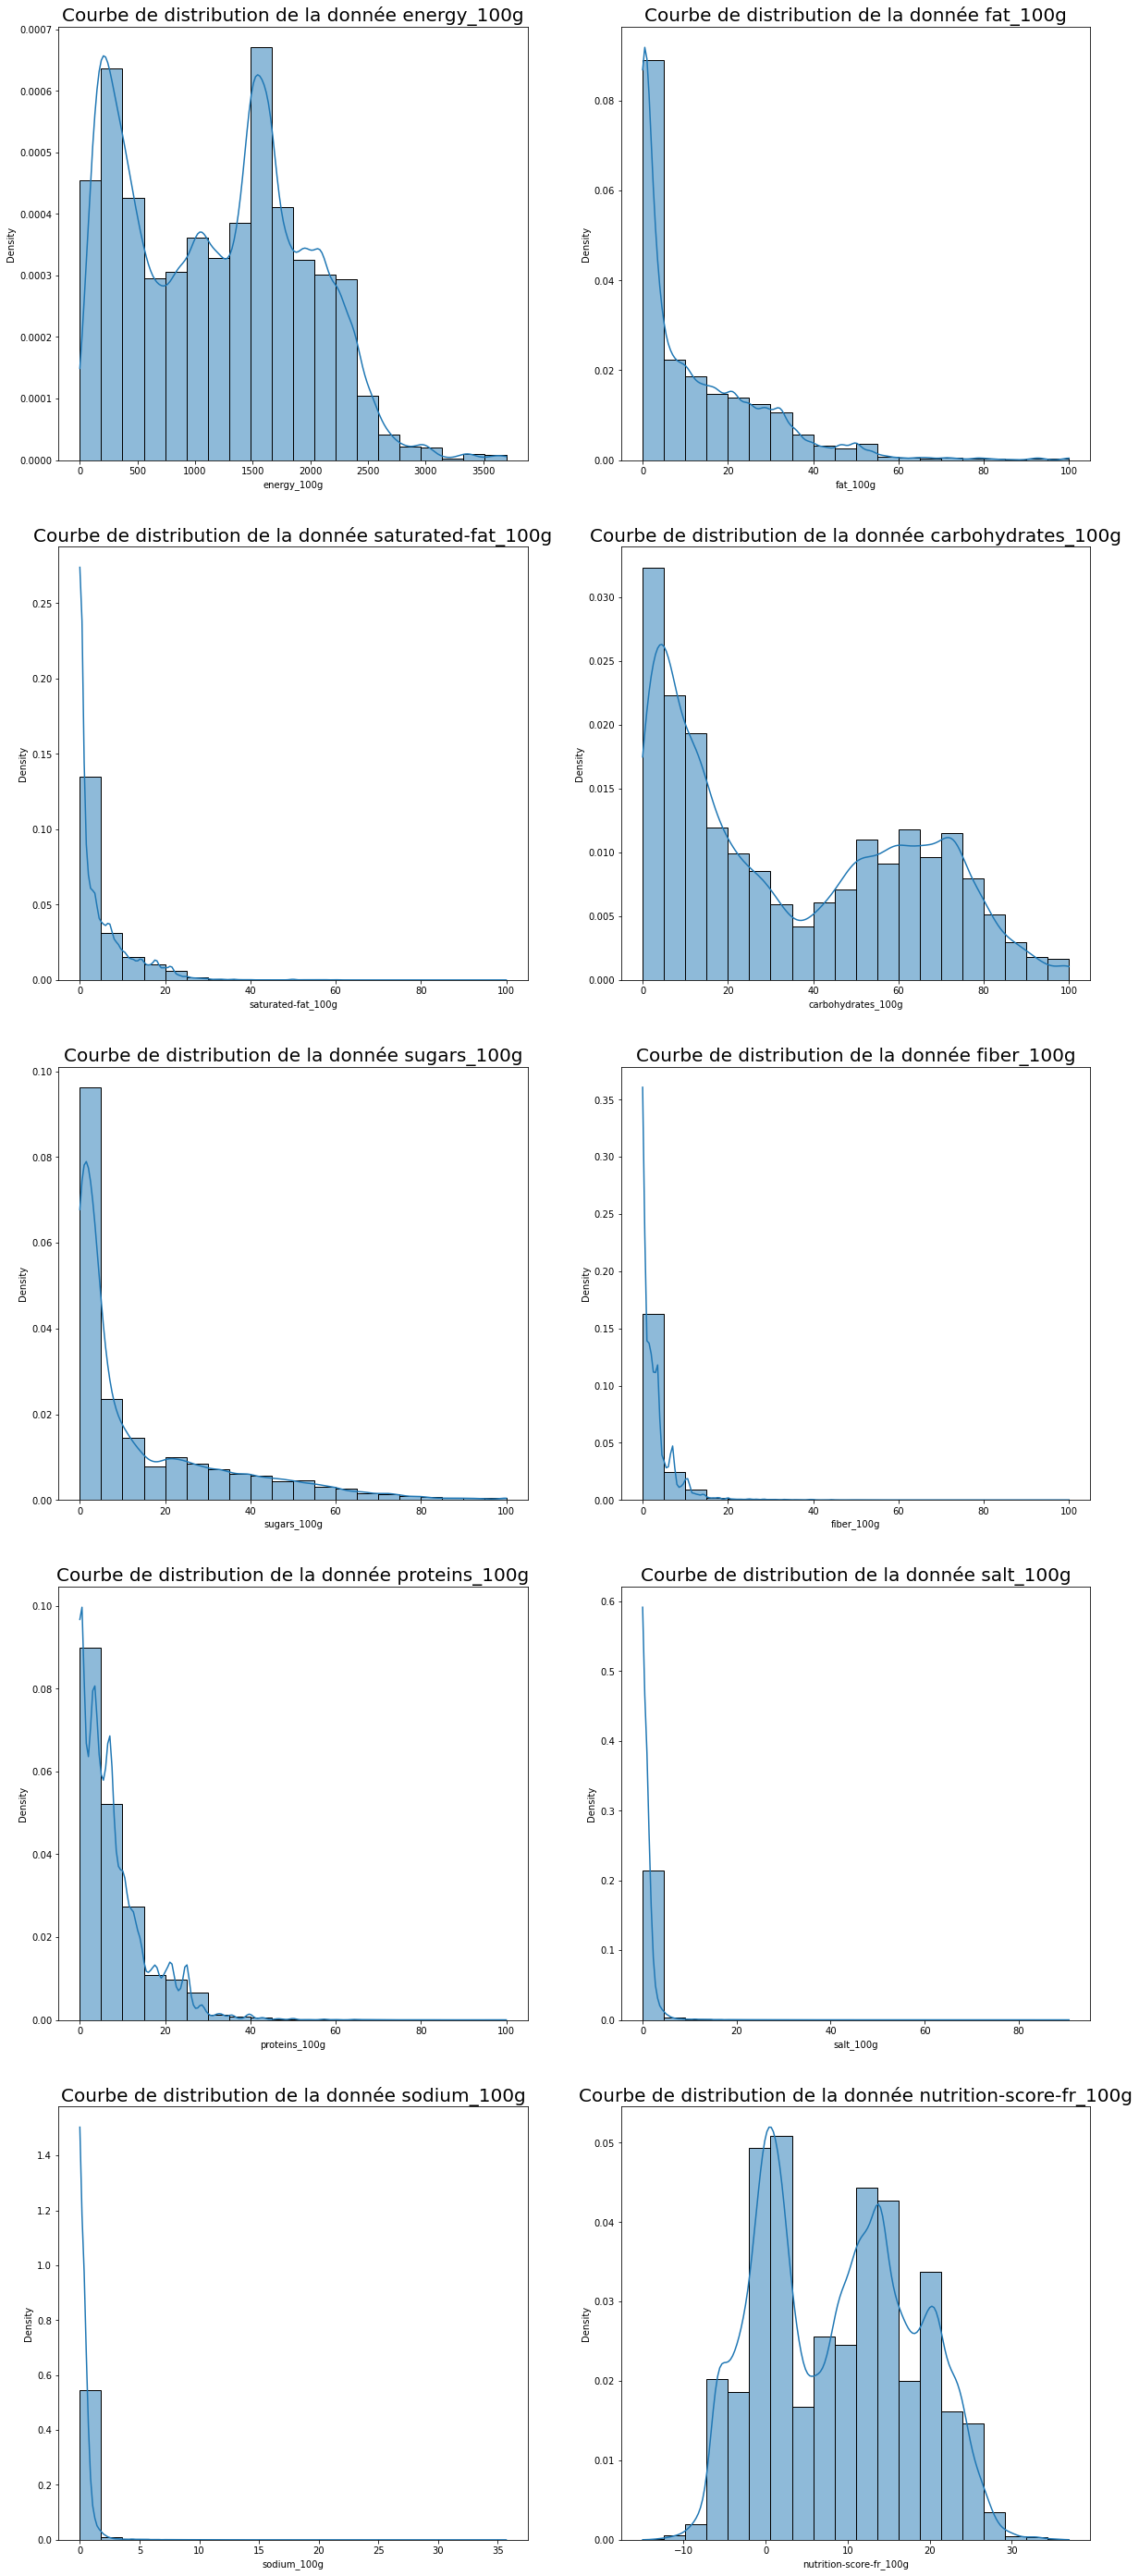

In [30]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g','nutrition-score-fr_100g']


fig, axes = plt.subplots(5, 2,figsize=(20, 50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    b = sns.histplot(data=df[col], kde=True, stat='density', ax=ax,bins=20)
    b.axes.set_title('Courbe de distribution de la donnée '+col,fontsize=20)

plt.show()

In [31]:
df.head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,Peanuts,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,Organic Salted Nut Mix,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
7,Organic Muesli,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
12,Zen Party Mix,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0


In [32]:
df.isnull().sum()

product_name                 0
nutrition_grade_fr         334
energy_100g                  0
fat_100g                     0
saturated-fat_100g           0
carbohydrates_100g           0
sugars_100g                  0
fiber_100g                   0
proteins_100g                0
salt_100g                    0
sodium_100g                  0
nutrition-score-fr_100g    334
dtype: int64

In [33]:
df.shape

(172270, 12)

In [34]:
df.drop_duplicates(keep=False,inplace=True)

In [35]:
df.shape

(151031, 12)

In [36]:
df_knn = df[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g',
       'sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','nutrition-score-fr_100g']]

knnimputer = KNNImputer(n_neighbors=3)

In [37]:
df_knn.iloc[:,:]=knnimputer.fit_transform(df_knn)

In [38]:
df_knn.isnull().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [39]:
df['nutrition-score-fr_100g']=df_knn.loc[:,'nutrition-score-fr_100g']

In [40]:
df.isnull().sum()

product_name                 0
nutrition_grade_fr         324
energy_100g                  0
fat_100g                     0
saturated-fat_100g           0
carbohydrates_100g           0
sugars_100g                  0
fiber_100g                   0
proteins_100g                0
salt_100g                    0
sodium_100g                  0
nutrition-score-fr_100g      0
dtype: int64

In [41]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000,151031.000000
mean,1198.201297,13.004177,4.672996,35.179693,15.206269,2.894745,7.745939,1.139157,0.448487,8.850750
std,734.792385,15.054578,6.833795,27.848537,19.264506,4.317769,7.756504,2.708997,1.066537,9.047737
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,498.000000,1.100000,0.000000,9.170000,1.630000,0.000000,2.380000,0.121920,0.048000,1.000000
50%,1226.000000,7.400000,1.790000,28.570000,5.740000,1.600000,5.880000,0.680720,0.268000,9.000000
75%,1753.000000,21.250000,6.900000,60.470000,24.000000,3.600000,10.710000,1.353820,0.533000,16.000000
max,3700.000000,100.000000,99.900000,100.000000,100.000000,100.000000,100.000000,90.703400,35.710000,37.000000


In [42]:
pd.unique(df['nutrition_grade_fr']).tolist()

['d', 'c', 'b', 'a', 'e', nan]

In [43]:
#fonction pour remplacer les grades 'lettre' en chiffre
def replace(grade,numero):
    df.loc[df['nutrition_grade_fr']==str(grade),'nutrition_grade_fr'] = numero

In [44]:
replace('a',1)
replace('b',2)
replace('c',3)
replace('d',4)
replace('e',5)

In [45]:
df.head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),4,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
3,Organic Salted Nut Mix,4,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
7,Organic Muesli,3,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
12,Zen Party Mix,4,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
15,Cinnamon Nut Granola,2,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


In [46]:
df_knn_grade = df[['nutrition_grade_fr','nutrition-score-fr_100g']]

knnimputer_grade = KNNImputer(n_neighbors=1)

In [47]:
df_knn_grade.iloc[:,:]=knnimputer_grade.fit_transform(df_knn_grade)

In [48]:
df_knn_grade.isnull().sum()

nutrition_grade_fr         0
nutrition-score-fr_100g    0
dtype: int64

In [49]:
df['nutrition_grade_fr']=df_knn_grade.loc[:,'nutrition_grade_fr']

In [50]:
df.isnull().sum()

product_name               0
nutrition_grade_fr         0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [51]:
pd.unique(df['nutrition_grade_fr']).tolist()

[4.0, 3.0, 2.0, 1.0, 5.0]

In [52]:
def replace_reverse(numero,grade):
    df.loc[df['nutrition_grade_fr']==numero,'nutrition_grade_fr'] = str(grade)

In [53]:
replace_reverse(1,'a')
replace_reverse(2,'b')
replace_reverse(3,'c')
replace_reverse(4,'d')
replace_reverse(5,'e')

In [54]:
df.head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
3,Organic Salted Nut Mix,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
7,Organic Muesli,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
12,Zen Party Mix,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
15,Cinnamon Nut Granola,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


In [56]:
df.to_csv('openfoodfact_nettoyer.csv',sep='\t')